# Classification Exercise - part 2
## 95-791 Data Mining (Fall 2021) 
#### Name: Xi Yan
#### Date: Thursday, November 11th


### Changing the author field and file name.

 (a) Change the `name:` field on the ipynb document from Your Name Here to your own name.

 (b) Rename this file to "Classification_A2_part2_YourHameHere.ipynb", where YourNameHere is changed to your own name.


### Installing and loading packages

Before you begin this exercise make sure you have installed all the required libraries. Load the libraries as indicated below.

You only need to install libraries once.  Once they're installed, you may use them by **importing** the libraries using the `import` command.  For today's lab, you'll want to run the following code


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.datasets import load_breast_cancer
%matplotlib inline
plt.style.use('seaborn-white')

The dataset - Heart failure clinical records Data Set- we will be working with comes from UCI's Machine Learning Repository. 

This dataset contains thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)

Target
- death event: if the patient deceased during the follow-up period (boolean)

**Read the dataset and print the first 5 rows**

In [2]:
hf = pd.read_csv("heart_failure_clinical_records_dataset.csv")
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,F,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,F,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,F,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,F,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,M,0,8,1


**Check if there are any missing values**

In [3]:
hf.info()
print(hf.isnull().sum(axis=0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 30.5+ KB
age    

**Before you go into modeling your data, you will need to turn `sex` into a numerical/binary columns.**

**Hint: the easiest way would be to create [dummy variables](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

In [4]:
hf['sex'] = pd.get_dummies(hf['sex'], drop_first=True)
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,0,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,0,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,0,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,0,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,1,0,8,1


**We now need to divide our dataset into `X` and `y`.**

In [5]:
X = hf[hf.columns.difference(['DEATH_EVENT'])]
feature_names = X.columns
y = hf['DEATH_EVENT']
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

**As any other classification or regression problem we are going to split our dataset into train and test datasets. Use a 20-80 ratio**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.20,
                                                    random_state=1)

---

### KNN

We are going to try a kNN (k-Nearest Naighbours) as our first classifier You can read more about it [here](https://scikit-learn.org/stable/modules/neighbors.html) or in last lecture slides. These will be explained in detail during Monday's class. We can use KNN for classification, as well as regression and unsupervised learning. Take a look at the documentation for the KNN Classifier in [scikitlearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

There are default parameter for the KNNClassifier:
- k=5 (Number of neighbors to use by default for kneighbors queries)
- weights = ’uniform’ (All points in each neighborhood are weighted equally)
- metric = ’minkowski’ (metric used to calculate [distances](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric)) 
    - 	sum(|x - y|^p)^(1/p)  --> if p=2, then this is equivalent to the Euclidean distance. By default p=2


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

**We first fit our KNN Classifier with our training data, and we will start by using the default number of neighbours.**

In [8]:
knn_hf = KNeighborsClassifier()
knn_hf.fit(X_train, y_train)

KNeighborsClassifier()

**We test our classifier with X_test, get their predictions. Use your test dataset to predict with your KNN classifier**

In [9]:
y_pred = knn_hf.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1]


**Now we need to know how good was that classification!**

$$Accuracy = \frac{TP + TN}{n}$$

Use your metrics.accuracy_score to obtain an accuracy score on your previous predictions

In [10]:
scores = metrics.accuracy_score(y_test,y_pred)
print(scores)

0.6333333333333333


We can also calculate the confusion matrix for the classification we just performed.


| Predicted\Observed     | Event | Non-event   |
| :---        |    :----:   |          ---: |
| Event    | TP      | FP  |
| Non-event   | FN       | TN    |

**Calculate the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) based on your y_test and your predictions. Print out your results.**

In [11]:
cm_hf = confusion_matrix(y_test,y_pred)
print(cm_hf)
print(classification_report(y_test, y_pred, digits=3))

[[37  9]
 [13  1]]
              precision    recall  f1-score   support

           0      0.740     0.804     0.771        46
           1      0.100     0.071     0.083        14

    accuracy                          0.633        60
   macro avg      0.420     0.438     0.427        60
weighted avg      0.591     0.633     0.610        60



**Are both your classes classified the same? Is there one harder to classify?**

Yes, class 1 (Death) has a precision of .1, and its harder to classify. This dataset is unbalanced with a 46 vs 14 distribution.

During last week's lectures we talked about the metrics you see in the classification report. Their definition are below.

$$Recall = \frac{TP}{TP + FN}$$

$$Precision = \frac{TP}{TP + FP} $$

$$F_1 = 2•\frac{precision•recall}{precision+recall} $$ Read more abiut the f1-score [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

**Use the [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) to plot your confusion matrix and appropriate labels. After calculated it do a `.plot()` on it**

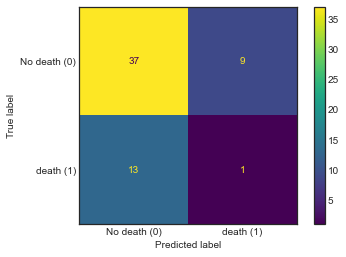

In [12]:
dissplay_cm_hf= ConfusionMatrixDisplay(confusion_matrix=cm_hf,
                                       display_labels=['No death (0)','death (1)'])
dissplay_cm_hf.plot();

**How does this plot help us?**

We can clearly see how many labels were predicted correctly. For example, for the label `death_event` there were 37 observations correctly classified, but 13 incorrectly classified as `no_death`.

**As a final task use the [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) to print out each of these metrics seperately**

In [13]:
print("Accuracy: "+str(metrics.accuracy_score(y_test, y_pred)))
print("Precision: "+str(metrics.precision_score(y_test, y_pred, average=None)))

Accuracy: 0.6333333333333333
Precision: [0.74 0.1 ]


---

### Naive Bayes

Let's try a different classifier with the same dataset. This time we'll try a [Naive Bayes classifier](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [14]:
from sklearn.naive_bayes import GaussianNB

**We need to fit a Naive Bayes classifier to our data. We will use X_test to make predictions with our classifier and print out its confusion matrix**

As you might have already figured out, most scikit-learn models are classes, therefore we need:
- Create an object if that class
- Fit our train data to that object (to create a model)
- Use our model to predict on our test data

After these three steos you can use your predictions to create a confusion matrix and a classification report.

In [15]:
nb_hf = GaussianNB()
nb_pred = nb_hf.fit(X_train, y_train).predict(X_test)
cm_hf = confusion_matrix(y_test,nb_pred)
print(classification_report(y_test, nb_pred, digits=3))

              precision    recall  f1-score   support

           0      0.938     0.978     0.957        46
           1      0.917     0.786     0.846        14

    accuracy                          0.933        60
   macro avg      0.927     0.882     0.902        60
weighted avg      0.933     0.933     0.931        60



**How well did this model do compared to KNN?**

It did much better!! Precision for both classes is above 0.9. Class 1 is still harder to classify but not by much.

**Use the ConfusionMatrixDisplay on your confusion matrix**

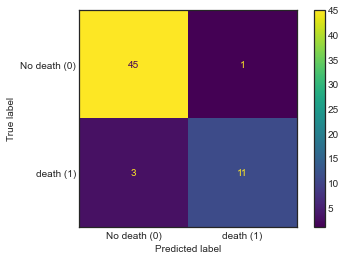

In [16]:
dissplay_cm_hf = ConfusionMatrixDisplay(confusion_matrix=cm_hf,
                                        display_labels=['No death (0)','death (1)'])
dissplay_cm_hf.plot();

---

## STOP HERE

We need to go over Logistic Regression before we get to the next part.


---

### Logistic Regression

**Let's try a third classifier with the same dataset. This time we'll try a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)**

In [17]:
from sklearn.linear_model import LogisticRegression

**We need to fit a LogisticRegression to our data. We will use X_test to make predictions with our classifier and print out its confusion matrix**

As you might have already figured out, most scikit-learn models are classes, therefore we need:
- Create an object if that class
- Fit our train data to that object (to create a model)
- Use our model to predict on our test data
- Print out its classification_report()

After these three steos you can use your predictions to create a confusion matrix and a classification report.

*Warning: you might get a "TOTAL NO. of ITERATIONS REACHED LIMIT." error when running this model. If this happens consider increasing the `max_iter` for the `LogisticRegression`.*

In [28]:
#your code here
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        46
           1       0.67      0.71      0.69        14

    accuracy                           0.85        60
   macro avg       0.79      0.80      0.80        60
weighted avg       0.85      0.85      0.85        60



/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Use the ConfusionMatrixDisplay on your confusion matrix**

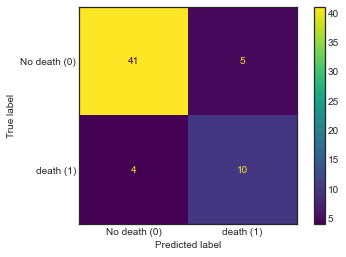

In [30]:
#your code here
cm_clf = confusion_matrix(y_test,y_pred)
dissplay_cm_logit = ConfusionMatrixDisplay(confusion_matrix=cm_clf,
                                        display_labels=['No death (0)','death (1)'])
dissplay_cm_logit.plot()

**How well did this model do compared to Naive Bayes?**

--> Your answer here
It is slightly worse than the Naive Bayes

**Overall which model (KNN, NB and LR) did better with this dataset?**

--> Your answer here
Naive Bayes does better among the two rest with this dataset

---

## ROC

For this next part we are going to compare our three models. For this we will use [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to calculate our tpr, fpr and thresholds, and [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) to calculate the AUC score.

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**For each model you have trained and used for prediction you can obtain the probabilities for 0 and 1 for each prediction (instead of the actual 0 or 1 result). Hint: instead of model.predict(), you can use model.predict_proba(dataset). Try this with your Naive Bayes first.**

In [36]:
#probabilities for Naive Bayes Classifier
nb_probs = nb_hf.predict_proba(X_test)
print("Predictions:\n", nb_pred) #my predictions for NB
print("probabilities of 0 outcome:\n", nb_probs[:, 0])
print("probabilities of 1 outcome:\n", nb_probs[:, 1])

Predictions:
 [0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
probabilities of 0 outcome:
 [0.83514788 0.99537508 0.4730544  0.81232765 0.95136189 0.94231163
 0.9831299  0.71105475 0.48237525 0.98422582 0.69174523 0.38620649
 0.34198026 0.97884692 0.47202057 0.9892742  0.73094164 0.6754847
 0.992919   0.5914391  0.94720769 0.36953861 0.82807259 0.26353468
 0.82148636 0.71102822 0.9978306  0.7828452  0.84176365 0.85413696
 0.88843424 0.99424447 0.88181734 0.99275393 0.66271567 0.46514907
 0.94679423 0.80314062 0.70196515 0.97598232 0.01764695 0.90163017
 0.82507464 0.94268738 0.64775419 0.16480662 0.91233128 0.90393386
 0.47375784 0.93212171 0.99269974 0.98423931 0.89841192 0.28989828
 0.77501063 0.95770804 0.96180994 0.97857091 0.93331642 0.71368979]
probabilities of 1 outcome:
 [0.16485212 0.00462492 0.5269456  0.18767235 0.04863811 0.05768837
 0.0168701  0.28894525 0.51762475 0.01577418 0.30825477 0.61379351
 

**We now have the probabilities, but we need to calculate the FPR and TPR according to each threshold. This will allow us to plot an ROC curve and calculate its AUC**

```
auc = roc_auc_score(data, probabilities)

fpr, tpr, thresholds = roc_curve(data, probabilities)

```

*Hint: use the positives probabilities for the roc_curve*

In [54]:
#your code here
auc = roc_auc_score(y_test, nb_probs[:,1])
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, nb_probs[:,1])

print("Thresholds:\n",thresholds)
print("FPR:\n",nb_fpr)
print("TPR:\n",nb_tpr)

Thresholds:
 [1.98235305 0.98235305 0.61379351 0.53485093 0.51762475 0.33728433
 0.3245153  0.26905836 0.22498937 0.08766872 0.06787829 0.0021694 ]
FPR:
 [0.         0.         0.         0.02173913 0.02173913 0.08695652
 0.08695652 0.2173913  0.2173913  0.54347826 0.54347826 1.        ]
TPR:
 [0.         0.07142857 0.5        0.5        0.78571429 0.78571429
 0.85714286 0.85714286 0.92857143 0.92857143 1.         1.        ]


**You now have the FPR and TPR for each threshold! You can now plot an ROC graph (FPR vs TPR). Print the AUC in your title.**

Text(0.5, 1.0, 'The AUC is 0.9332298136645962')

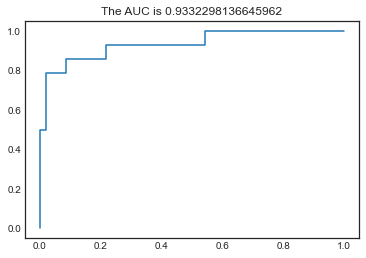

In [49]:
#your code here
plt.plot(nb_fpr, nb_tpr)
plt.title('The AUC is ' + str(auc))

**You can do the same for any of your three models. Try doing this for KNN and LogisticRegression, then take their results and plot them in the same ROC plot to compare them.**

In [56]:
#your code here
# probabilities, AUC, ROC
knn_probs = knn_hf.predict_proba(X_test)
knn_auc = roc_auc_score(y_test, knn_probs[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_probs[:,1])

clf_probs = clf.predict_proba(X_test)
clf_auc = roc_auc_score(y_test, clf_probs[:,1])
clf_fpr, clf_tpr, clf_thresholds = roc_curve(y_test, clf_probs[:,1])

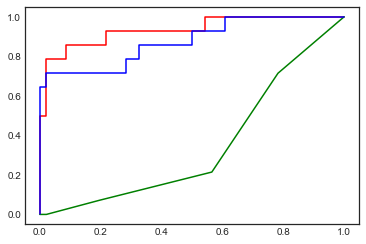

In [57]:
#Combined
#your code here
plt
plt.plot(nb_fpr, nb_tpr, color='Red')
plt.plot(knn_fpr, knn_tpr, color='green')
plt.plot(clf_fpr, clf_tpr, color='blue')
plt.show()

**Which one is your best model out of LR, NB and KNN?**

--> your answer here

The Naive Bayes is the best model out of LR and KNN.